In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
from glob import glob

Buildings with ages and height

In [2]:
buildings = gpd.read_parquet("/data/uscuni-ulce/extension/netherlands/clean_3035.parquet")
buildings

,longest_ridge_line_height,year_of_construction,geometry
0,128.363724,2015.0,"POLYGON Z ((3982322.484 3145988.954 0, 3982322..."
1,32.571911,1970.0,"POLYGON Z ((3982582.398 3146184.327 0, 3982546..."
2,NaN,2021.0,"POLYGON Z ((3982712.038 3146056.908 0, 3982719..."
3,30.822750,2021.0,"POLYGON Z ((3982739.221 3146039.965 0, 3982732..."
4,NaN,1965.0,"POLYGON Z ((3982645.642 3146150.005 0, 3982646..."
...,...,...,...
10771542,NaN,2016.0,"POLYGON Z ((4092656.964 3352706.947 0, 4092654..."
10771543,NaN,1990.0,"POLYGON Z ((4092594.243 3352660.78 0, 4092589...."
10771544,NaN,1997.0,"POLYGON Z ((4092487.629 3352862.485 0, 4092492..."
10771545,NaN,1997.0,"POLYGON Z ((4092477.078 3352892.72 0, 4092474...."


In [23]:
buildings["year"] = buildings["year"].replace(9999, np.nan)

In [4]:
buildings.dtypes

longest_ridge_line_height     float64
year_of_construction          float64
geometry                     geometry
dtype: object

In [24]:
buildings["year"].max()

np.float64(2026.0)

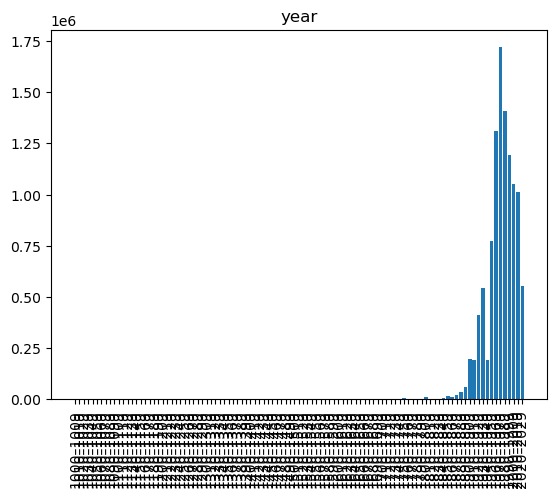

In [25]:
bins = list(range(1000, 2040, 10))
bin_centers = [(bins[i] + bins[i+1]) // 2 for i in range(len(bins)-1)]
bin_labels = [f'{bins[i]}–{bins[i+1]-1}' for i in range(len(bins)-1)]
buildings.hist(column="year",bins=bins, rwidth=0.8)
plt.xticks(bin_centers, bin_labels, rotation=90)
plt.grid(False)

Morphotopes.

In [ ]:
files_morph = glob(f"/data/uscuni-ulce/data_product/extension_1/nl*_morphotopes.parquet")
morphotopes_list = []
for f in files_morph:
    data = gpd.read_parquet(f)
    morphotopes_list.append(data)

In [ ]:
morphotopes = pd.concat(morphotopes_list).set_index("morphotope_id")

In [27]:
gdf = gpd.GeoDataFrame(buildings[['year', 'longest_ridge_line_height','geometry']])
gdf = gdf.set_geometry(gdf.geometry.centroid)

In [28]:
gdf.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Eur

In [31]:
morphotopes.index.is_unique

True

Join buidings to morphotopes

In [32]:
joined_morphotopes = gdf.sjoin(morphotopes[["geometry"]], predicate="within")
joined_morphotopes

,year,longest_ridge_line_height,geometry,morphotope_id
0,2015.0,128.363724,POINT (3982319.491 3145989.144),436461_1949_-3628
1,1970.0,32.571911,POINT (3982567.418 3146170.679),503256_0_-1
2,2021.0,NaN,POINT (3982716.2 3146056.519),503256_0_-1
3,2021.0,30.822750,POINT (3982735.202 3146037.791),503256_0_-1
4,1965.0,NaN,POINT (3982640.121 3146166.22),503256_0_-1
...,...,...,...,...
10771542,2016.0,NaN,POINT (4092655.274 3352706.804),528646_534_-2052
10771543,1990.0,NaN,POINT (4092589.996 3352656.761),528646_534_476
10771544,1997.0,NaN,POINT (4092488.086 3352868.053),528646_534_399
10771545,1997.0,NaN,POINT (4092475.186 3352892.589),528646_534_399


Group building values

In [37]:
grouped_stats = grouped.agg(
    num_buildings=('year', 'count'),  # <-- total number of buildings (rows)

    year_mean=('year', 'mean'),
    year_median=('year', 'median'),
    year_min=('year', 'min'),
    year_q10=('year', lambda x: x.quantile(0.1)),
    year_q90=('year', lambda x: x.quantile(0.9)),
    year_max=('year', 'max'),
    year_std=('year', 'std'),
    year_mode=('year', mode_bin)
).round(2)
grouped_stats

,num_buildings,year_mean,year_median,year_min,year_q10,year_q90,year_max,year_std,year_mode
morphotope_id,,,,,,,,,
436461_1949_-3628,1,2015.00,2015.0,2015.0,2015.0,2015.0,2015.0,NaN,"(2010, 2020]"
436461_1950_-3629,3,1943.00,1948.0,1908.0,1916.0,1968.0,1973.0,32.79,"(1900, 1910]"
436461_1951_-3630,30,1975.63,1975.0,1930.0,1948.0,2021.1,2022.0,29.40,"(1950, 1960]"
436461_1952_-3631,4,1938.50,1951.5,1880.0,1895.6,1971.0,1971.0,43.12,"(1970, 1980]"
436461_1953_-3790,25,1955.64,1960.0,1620.0,1900.0,2021.6,2022.0,85.38,"(2020, 2030]"
...,...,...,...,...,...,...,...,...,...
532252_96_-105,11,1953.91,1972.0,1915.0,1925.0,1981.0,1992.0,29.61,"(1920, 1930]"
532252_97_-106,1,2000.00,2000.0,2000.0,2000.0,2000.0,2000.0,NaN,"(1990, 2000]"
532252_98_-107,2,1953.00,1953.0,1952.0,1952.2,1953.8,1954.0,1.41,"(1950, 1960]"


In [35]:
bins = list(range(1000,2040,10))
def mode_bin(x):
    binned = pd.cut(x, bins=bins, right=True)
    m = binned.mode()
    return m.iloc[0] if not m.empty else None

In [36]:
grouped = joined_morphotopes.groupby("morphotope_id")

In [39]:
morphotopes_age = morphotopes.join(grouped_stats, how='inner')
morphotopes_age

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,year_mean,year_median,year_min,year_q10,year_q90,year_max,year_std,year_mode
morphotope_id,,,,,,,,,,,,,,,,,,
521011_225_18,"MULTIPOLYGON (((4053728.884 3307972.525, 40537...",False,1,2,4,6,9,18,36,177,1957.93,1960.0,1900.0,1916.8,2006.4,2024.0,36.08,"(1920, 1930]"
521011_296_-289,"MULTIPOLYGON (((4053019.117 3308909.075, 40530...",True,1,2,4,5,8,16,33,7,1976.00,1980.0,1939.0,1939.0,2001.6,2004.0,26.85,"(1930, 1940]"
521011_299_-292,"MULTIPOLYGON (((4053319.718 3308850.205, 40533...",True,1,2,4,5,8,16,33,3,1946.00,1939.0,1939.0,1939.0,1955.8,1960.0,12.12,"(1930, 1940]"
521011_298_-291,"MULTIPOLYGON (((4053732.703 3308453.913, 40537...",True,1,2,4,6,9,18,36,6,1962.50,1970.0,1935.0,1935.5,1982.0,1989.0,22.04,"(1930, 1940]"
521011_225_33,"MULTIPOLYGON (((4050770.63 3308811.009, 405077...",False,1,2,4,5,8,16,33,119,1957.97,1975.0,1701.0,1900.0,2008.4,2023.0,55.22,"(1970, 1980]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515406_0_213,"MULTIPOLYGON (((4041294.534 3090233.245, 40412...",False,2,4,8,17,26,57,108,199,1949.83,1930.0,1851.0,1910.0,1999.0,2019.0,37.82,"(1910, 1920]"
515406_0_204,"MULTIPOLYGON (((4041561.836 3090349.241, 40415...",False,2,4,8,17,26,57,110,183,1976.73,1978.0,1914.0,1927.0,2010.0,2023.0,27.75,"(1990, 2000]"
515406_0_286,"MULTIPOLYGON (((4041195.366 3089923.462, 40411...",False,2,4,7,13,20,46,84,95,1977.51,1971.0,1920.0,1951.0,2017.0,2023.0,27.19,"(1950, 1960]"


In [40]:
morphotopes_age = morphotopes_age[
    (morphotopes_age['num_buildings'] != 0) &
    (morphotopes_age['initially_noise'] == False)
]

Join morphometrics

In [41]:
morphometrics = pd.read_parquet("/data/uscuni-ulce/data_product/extension_1/morphotope_data_fr_sp_nl_be.parquet")

In [43]:
joined = morphotopes_age.join(morphometrics,how='left')
joined

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,...,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,midBAD,limLPS,limAre
morphotope_id,,,,,,,,,,,,,,,,,,,,,
521011_225_18,"MULTIPOLYGON (((4053728.884 3307972.525, 40537...",False,1,2,4,6,9,18,36,177,...,0.620055,0.978864,0.507343,16.388410,2.329022,2.329022,94.435073,185.274935,1.0,11348.957087
521011_225_33,"MULTIPOLYGON (((4050770.63 3308811.009, 405077...",False,1,2,4,5,8,16,33,119,...,0.665201,0.981524,0.526340,18.899086,2.686266,2.686266,264.679079,361.560865,1.0,12878.289441
518117_85_0,"MULTIPOLYGON (((4022344.047 3314208.157, 40223...",False,1,2,3,4,7,13,28,99,...,0.791933,0.935607,0.525757,15.899725,2.298359,2.298359,64.892938,348.053095,1.0,3366.740133
518117_85_1,"MULTIPOLYGON (((4022722.253 3314400.16, 402270...",False,2,4,7,15,22,52,95,127,...,0.713726,0.887755,0.538533,17.476544,2.353580,2.353580,49.204522,54.063885,1.0,2690.988675
518117_85_6,"MULTIPOLYGON (((4020342.166 3313838.196, 40203...",False,2,4,7,12,18,40,75,110,...,0.805763,0.881491,0.500660,16.662267,2.299849,2.299849,48.120645,41.022839,1.0,1978.213503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515406_0_213,"MULTIPOLYGON (((4041294.534 3090233.245, 40412...",False,2,4,8,17,26,57,108,199,...,0.770499,0.443847,0.351917,76.616847,4.150403,4.150403,94.859974,78.712397,1.0,18852.599002
515406_0_204,"MULTIPOLYGON (((4041561.836 3090349.241, 40415...",False,2,4,8,17,26,57,110,183,...,0.505559,0.826077,0.397566,27.408483,2.522097,2.522097,37.019730,40.905609,1.0,4437.607859
515406_0_286,"MULTIPOLYGON (((4041195.366 3089923.462, 40411...",False,2,4,7,13,20,46,84,95,...,0.723351,1.004207,0.580684,11.650693,1.399535,1.399535,38.827705,47.386602,1.0,1824.192667


In [45]:
joined.to_parquet("/data/uscuni-evolution/all_joined_nl.parquet")